In [15]:
import glob
import pandas as pd

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [17]:
training = glob.glob('./final_model*.csv')

In [18]:
training

['./final_model_8000_0.0009_0.75.csv',
 './final_model_8000_0.0009_0.87.csv',
 './final_model_8000_0.0007_0.82.csv',
 './final_model_8000_0.0009_0.82.csv',
 './final_model_8000_0.0007_0.75.csv',
 './final_model_8000_0.0007_0.87.csv']

In [19]:
data = [pd.read_csv(x).rename(columns={'Unnamed: 0': 'iteration'}) for x in training]
data = pd.concat(data)

In [20]:
grouped = data.groupby('agent_hash')

<Figure size 640x480 with 0 Axes>

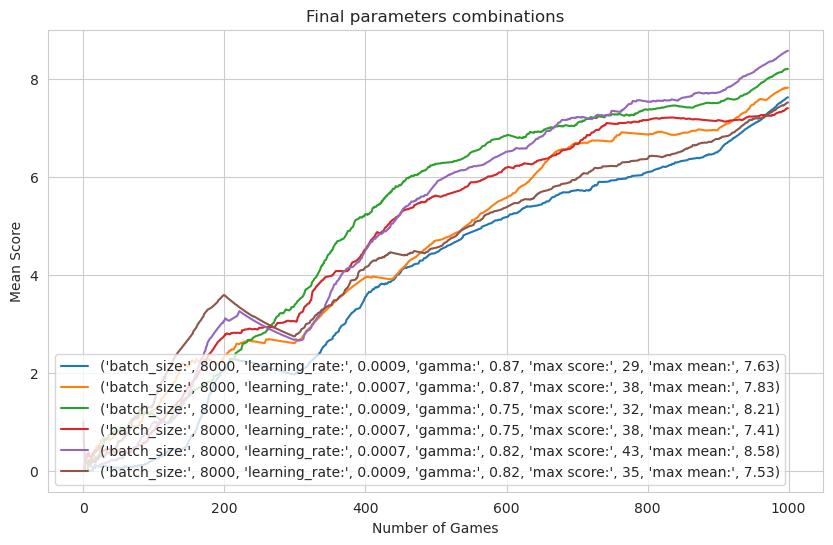

In [21]:
plt.clf()
plt.figure(figsize=(10,6))
plt.title('Final parameters combinations')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
for hash, g in grouped:
    plt.plot(g['mean_scores'])
    legend_labels.append(('batch_size:', g['batch_size'].values[0], 
                          'learning_rate:', g['learning_rate'].values[0], 
                          'gamma:', g['gamma'].values[0], 
                          'max score:', g['scores'].max(),
                         'max mean:', round(g['mean_scores'].max(),2)))
plt.legend(legend_labels, loc='lower left')
plt.show()

In [23]:
training = glob.glob('./lasttest*.csv')
training

['./lasttest_final_model_8000_0.0009_0.75_maxscore.csv',
 './lasttest_final_model_8000_0.0007_0.75_final.csv',
 './lasttest_final_model_8000_0.0009_0.82_final.csv',
 './lasttest_final_model_8000_0.0007_0.82_maxmean.csv',
 './lasttest_final_model_8000_0.0009_0.82_maxscore.csv',
 './lasttest_final_model_8000_0.0009_0.82_maxmean.csv',
 './lasttest_final_model_8000_0.0007_0.75_maxscore.csv',
 './lasttest_final_model_8000_0.0007_0.87_final.csv',
 './lasttest_final_model_8000_0.0007_0.75_maxmean.csv',
 './lasttest_final_model_8000_0.0007_0.82_maxscore.csv',
 './lasttest_final_model_8000_0.0007_0.87_maxmean.csv',
 './lasttest_final_model_8000_0.0009_0.87_maxmean.csv',
 './lasttest_final_model_8000_0.0007_0.82_final.csv',
 './lasttest_final_model_8000_0.0009_0.87_final.csv',
 './lasttest_final_model_8000_0.0009_0.75_final.csv',
 './lasttest_final_model_8000_0.0009_0.87_maxscore.csv',
 './lasttest_final_model_8000_0.0009_0.75_maxmean.csv',
 './lasttest_final_model_8000_0.0007_0.87_maxscore.csv'

In [24]:
data = [pd.read_csv(x).rename(columns={'Unnamed: 0': 'iteration'}) for x in training]
data = pd.concat(data)
grouped = data.groupby('model')

<Figure size 640x480 with 0 Axes>

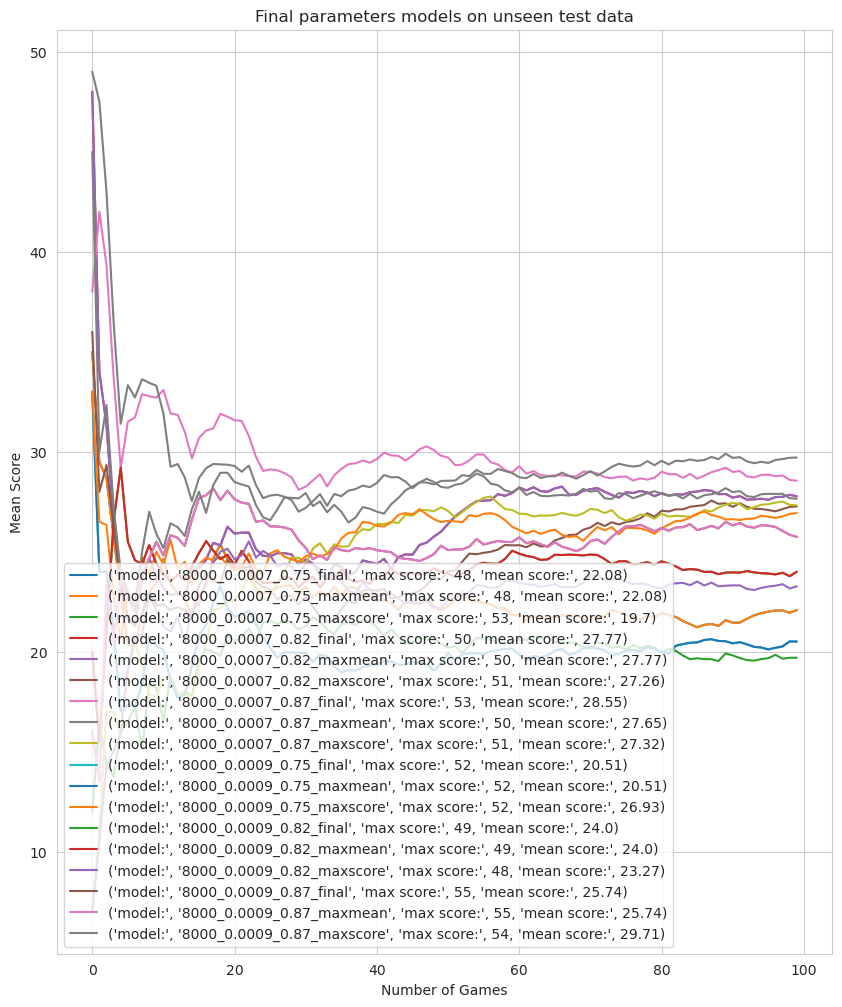

In [40]:
plt.clf()
plt.figure(figsize=(10,12))
plt.title('Final parameters models on unseen test data')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
for hash, g in grouped:
    plt.plot(g['mean_scores'])
    legend_labels.append(('model:', g['model'].values[0].split('final_model_')[-1], 
                          'max score:', g['scores'].max(),
                         'mean score:', round(g['mean_scores'].tail(1).values[0],2)))
plt.legend(legend_labels, loc='lower left')
plt.show()

In [41]:
training = glob.glob('./retrained*.csv')
training

['./retrained_final_model_long_8000_0.0007_0.82_maxscore.csv',
 './retrained_final_model_long_8000_0.0007_0.82_final.csv',
 './retrained_final_model_long_8000_0.0007_0.82_maxmean.csv']

In [42]:
data = [pd.read_csv(x).rename(columns={'Unnamed: 0': 'iteration'}) for x in training]
data = pd.concat(data)
grouped = data.groupby('model')

<Figure size 640x480 with 0 Axes>

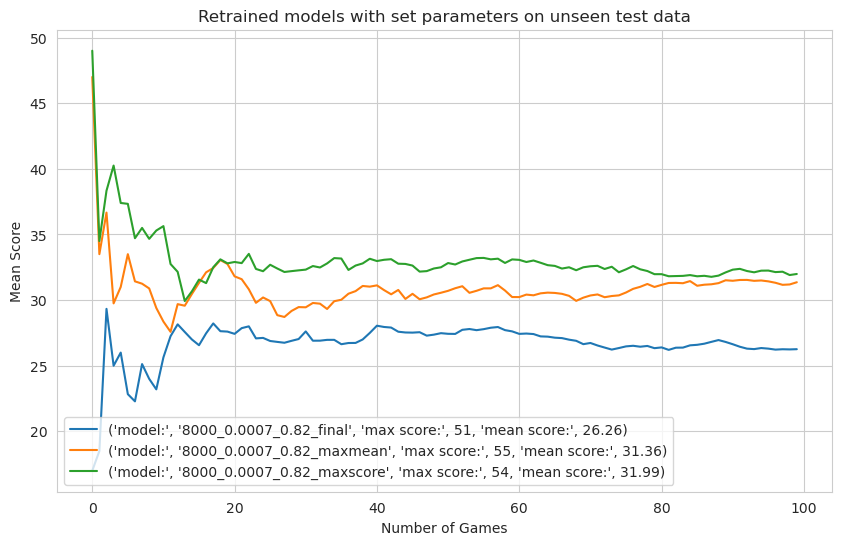

In [46]:
plt.clf()
plt.figure(figsize=(10,6))
plt.title('Retrained models with set parameters on unseen test data')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
for hash, g in grouped:
    plt.plot(g['mean_scores'])
    legend_labels.append(('model:', g['model'].values[0].split('final_model_long_')[-1], 
                          'max score:', g['scores'].max(),
                         'mean score:', round(g['mean_scores'].tail(1).values[0],2)))
plt.legend(legend_labels, loc='lower left')
plt.show()